# Code Assignment Mod6L14 — Confusion Matrix & Metrics on Restaurant Inspections

**Format:** Instructor Guidance → Your Task → We Share (Reflection)

**Goal:** Using the same **classification workflow** and models as last time, build confusion matrices and calculate accuracy, precision, and recall of each model.  


## Instructor Guidance (Pseudocode + Docs)

Use this as a roadmap; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- Logistic Regression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
- Confusion Matrix / Classification Report — scikit-learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  
- `pandas.get_dummies` (one-hot) — https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Guidance (same models as last challenge -- FEEL free to copy and paste the code that you need from the last code assignment)

1) **Load CSV** → preview shape & columns.  
2) **Define target (y)** as a **binary** label: e.g., `CRITICAL FLAG == "Critical"` → 1, else 0 *(positive class = “Critical”)*.  
3) **Pick features (X)**: start small (`SCORE`), then add categorical dummies (`BORO`, `CUISINE DESCRIPTION`), keep it simple.  
4) **Minimal prep**: coerce **only used columns** to numeric (for numeric features); `get_dummies` for categoricals (`drop_first=True`). Drop NA rows on used cols.  
5) **Train–test split (80/20)** with fixed `random_state`.  
6) **Fit the same model** as last time (e.g., `LogisticRegression`), predict on **test**.  
7) **Evaluate**: confusion matrix, **accuracy**, **precision**, **recall**, **F1** (classification_report).  
8) **Repeat for 2 more models** (A (baseline)/B (single term)/C (more than one term)) on the **same split**; compare metrics.  
9) **Decide** which model is better for the business goal based on **precision vs recall** trade-offs.  


## Your Task

Work in pairs. Comment your choices briefly. Keep code simple and readable.

> **Reminder (last challenge model):** You trained **LogisticRegression**, on three models you will use those same 3 models!


### 1) Read the Restaurant Inspection CSV & Preview

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score


In [2]:
df = pd.read_csv('/Users/ayemaq/Desktop/marcy_lab/DA2025_Lectures/Mod6/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20251104 copy.csv')

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50174196,THE GREATS OF CRAFT,Queens,47-20,CENTER BOULEVARD,11109.0,3479312023,NaN,01/01/1900,NaN,...,NaN,40.745641,-73.957137,402.0,26.0,100.0,4538318.0,4.000210e+09,QN31,POINT (-73.957136627525 40.745640668157)
1,50140563,CANTEEN @ CHELSEA PIERS FIELD HOUSE,Brooklyn,601,DEAN STREET,11238.0,6313880993,NaN,01/01/1900,NaN,...,NaN,40.680616,-73.969992,308.0,35.0,16300.0,3428601.0,3.000000e+09,BK64,POINT (-73.969992200023 40.68061568349)
2,50177123,70 7TH AVENUE SOUTH THEROS LLC,Queens,3009,35TH ST,11103.0,6468076482,NaN,01/01/1900,NaN,...,NaN,40.764778,-73.918674,401.0,22.0,6300.0,4009926.0,4.006500e+09,QN70,POINT (-73.918674354617 40.764778282908)
3,50001285,Y & B ENTERTAINMENT MANOR,Queens,3509,PRINCE STRRET,NaN,7188881778,Korean,06/24/2018,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
4,50172517,MAPLE CREAMERY,Brooklyn,653,STERLING PLACE,11216.0,7188095106,NaN,01/01/1900,NaN,...,NaN,40.673255,-73.956830,308.0,35.0,21900.0,3031390.0,3.012380e+09,BK61,POINT (-73.956830036833 40.673255481805)


In [4]:
df.keys()

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location'],
      dtype='object')

In [5]:
df['CUISINE DESCRIPTION'].tail()

291273            Japanese
291274       Jewish/Kosher
291275    Chinese/Japanese
291276      Latin American
291277          Coffee/Tea
Name: CUISINE DESCRIPTION, dtype: object

In [6]:
# count how many of each cuisine there are, make sure to show all the lists of the cusine
cuisine_counts = df['CUISINE DESCRIPTION'].value_counts()
cuisine_counts

CUISINE DESCRIPTION
American              45314
Chinese               28350
Coffee/Tea            20247
Pizza                 17372
Latin American        13320
                      ...  
Nuts/Confectionary       35
Czech                    15
Polynesian                6
Haute Cuisine             5
Chimichurri               2
Name: count, Length: 90, dtype: int64

In [7]:
# ex[tra code to see all the cuisine types without truncation
pd.set_option('display.max_rows', None)
cuisine_counts

CUISINE DESCRIPTION
American                          45314
Chinese                           28350
Coffee/Tea                        20247
Pizza                             17372
Latin American                    13320
Mexican                           11977
Bakery Products/Desserts          11324
Caribbean                         10774
Japanese                          10251
Italian                            9561
Chicken                            7528
Spanish                            6744
Asian/Asian Fusion                 5595
Juice, Smoothies, Fruit Salads     5247
Sandwiches                         5193
Donuts                             5165
Indian                             4499
Korean                             4487
Thai                               4414
Hamburgers                         4232
Jewish/Kosher                      4128
Mediterranean                      3349
Frozen Desserts                    3113
Tex-Mex                            3022
Other               

In [8]:
# How many total types of cuisine are there?
total_cusine = cuisine_counts.shape[0]
total_cusine

90

### 4) Minimal Cleaning: Drop NAs in Used Columns

Do this **per model** so each spec uses its own “clean” subset (same **target** slice).


In [9]:
# time to clean up the data! boi oh boi 
df['CRITICAL FLAG'].unique()

array(['Not Applicable', 'Critical', 'Not Critical'], dtype=object)

In [10]:
df['CRITICAL FLAG'].isna().sum()

0

In [11]:
df['CUISINE DESCRIPTION'].isna().sum()

3898

In [12]:
# Do this **per model** so each spec uses its own “clean” subset (same **target** slice).
df = df.dropna(subset=['CUISINE DESCRIPTION', 'CRITICAL FLAG'])


### 2) Define the Binary Target (y)

We’ll predict whether an inspection had a **Critical violation**.

- Target rule: `CRITICAL FLAG == "Critical"` → **1**, else **0**.
- Positive class = **1 (Critical)** — keep this in mind for **precision/recall** meaning.


You’re training your model to predict whether an inspection will have a critical violation based on the restaurant’s inspection details.

In [13]:
# so our y is critical flag
df['critical_flag'] = df['CRITICAL FLAG'].apply(lambda x: 1 if x == 'Critical' else 0)

In [ ]:
y = df['critical_flag']

### 3) Create Three Models (you can copy and paste the same modeling code from last code assignment here it is okay if your models have different features as long as you have 3 models)

- **Model A (minimal numeric):** `SCORE` only (lower is better in NYC scoring).  
- **Model B (add location):** `SCORE` + one-hot `BORO`.  
- **Model C (richer categories):** `SCORE` + one-hot `BORO` + top cuisines (one-hot of `CUISINE DESCRIPTION` limited to most frequent K).

> If any column is missing in your file, skip that spec or adjust accordingly.


For `CUISINE DESCRIPTION`: This column has many different categories (90 to be exact) 
- So When you one-hot encode a categorical column like this, pandas creates a new column for every unique category.
-  if you have 90 cuisine types, pd.get_dummies() would make 90 new columns.
- That’s a problem because: (well maybe not a problem but thats too much bruh)
    - It makes your model huge and slow to train.
    - Many cuisines have only a handful of samples, too little data to actually teach the model.
    - It increases noise (the model sees rare cuisines that don’t really help prediction).
- So my solution is to use  preprocessing: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_source=chatgpt.com

- sparse = True -> stores the 0s efficiently (saves memory).
- handle_unknown='ignore':  avoids errors when new cuisines appear in the test set.
- Then you can combine it with your other features aka SCORE and BORO.

High key these parameters are AURA because the OneHotEncoder does create the same ~90 dummy variables, but it doesn’t store all the zeros. It stores it in a special “sparse matrix” format, kind of like saying:
- “I’ll just remember where the 1s are; everything else is automatically 0.”
- So you’re saving tons of memory and time.

Your model still sees the 90 columns mathematically, but your computer isn’t physically holding a the big ahh table


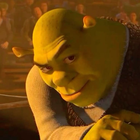

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Model A: minimal numeric
X_A = df[['SCORE']]

# Model B: add location (BORO)
X_B = pd.get_dummies(df[['SCORE', 'BORO']], drop_first=True)

# Model C: add cuisine (using OneHotEncoder for efficiency)
encoder = OneHotEncoder(drop='first', sparse=True, handle_unknown='ignore')
encoded_cuisine = encoder.fit_transform(df[['CUISINE DESCRIPTION']])

# Combine SCORE + BORO + encoded cuisines
X_C = pd.concat([
    pd.get_dummies(df[['SCORE', 'BORO']], drop_first=True),
    pd.DataFrame(encoded_cuisine.toarray(), columns=encoder.get_feature_names_out(['CUISINE DESCRIPTION']))
], axis=1)


In [ ]:
print("Model A:", X_A.shape)
print("Model B:", X_B.shape)
print("Model C:", X_C.shape)

Model A: (287380, 1)
Model B: (287380, 5)
Model C: (287380, 15)


### 5) Train–Test Split (same split for all models)

Use **the same random_state** so models A/B/C are comparable.


In [25]:
# train split the data 
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X_A, y, test_size=0.2, random_state=42, stratify=y)
X_trainB, X_testB, y_trainB, y_testB = train_test_split(X_B, y, test_size=0.2, random_state=42, stratify=y)
X_trainC, X_testC, y_trainC, y_testC = train_test_split(X_C, y, test_size=0.2, random_state=42, stratify=y)


### 6) Fit the Same Models on the Train sets (Logistic Regression), Get Predictions, Print Confusion Matrices & Metric Reports

> **This is new**:  Be sure to look up documentation on `confusion_matrix` and `classification_report`.  Get a matrix and metrics report (accuracy, precision, recall, f1) for each model.


In [ ]:
# fit the smae models on the train sets - logistic regression, get predictions, print confusion matrices and metric reports


### 7) Visualize One Confusion Matrix 

Be able to interpret this Matrix 

In [17]:
None



### 8) Decide Which Model Is “Better” — Explain Your Metric Choice

- If the **cost of missing a Critical** violation is high → prioritize **Recall** on the positive class.  
- If the **cost of wrongly flagging Critical** is high → prioritize **Precision** on the positive class.  
- If you want a balance → **F1**.

Write 3–5 sentences justifying your pick using the table above (Precision/Recall/F1).


## We Share (Reflection)

1) **Chosen model (A/B/C)** and **why**, referencing **Precision/Recall/F1** for the **Critical (1)** class.  
2) Your **confusion matrix** and a one-liner in plain English:  
   - “Out of all inspections we predicted **Critical**, **X%** were actually Critical (Precision).  
   - Of all actually **Critical** inspections, we caught **Y%** (Recall).”  